### 数据获取
编写爬虫程序从网络上获取金庸小说并写入本地txt文件中。

In [1]:
# -*- coding: utf-8 -*-
#引入爬虫常用的包
#下面两个开源包一般需要自己安装
#打开Anaconda Prompt （或者cmd） 输入命令
#pip install urllib
#pip install bs4
#爬虫程序主要参考：https://blog.csdn.net/jclian91/article/details/78835371，作者：剑与星辰

import urllib.request         
from bs4 import BeautifulSoup

#编写获取每本书章节内容的函数
def get_chapter(url):
    # 获取网页的源代码
    html = urllib.request.urlopen(url)  
    content = html.read().decode('utf8')
    html.close()
    # 将网页源代码解析成HTML格式
    soup = BeautifulSoup(content, "lxml")
    title = soup.find('h1').text    #获取章节的标题
    text = soup.find('div', id='htmlContent')    #获取章节的内容
    #处理章节的内容，使得格式更加整洁、清晰
    content = text.get_text('\n','br/').replace('\n', '\n    ')
    content = content.replace('　　', '\n　　')
    return title, '    '+content

#编写爬虫运行的主程序（函数）
#小说所在的网站：http://jinyong.zuopinj.com
#打开网页看看小说分布的特点和对应页码

def main():
    books = ['射雕英雄传','天龙八部','鹿鼎记','神雕侠侣','笑傲江湖','碧血剑','倚天屠龙记',\
             '飞狐外传','书剑恩仇录','连城诀','侠客行','越女剑','鸳鸯刀','白马啸西风',\
             '雪山飞狐']
    order = [1,2,3,4,5,6,7,8,10,11,12,14,15,13,9]  #对应的书籍列表
    #网页上存储相应书籍的页码
    page_range = [1,43,94,145,185,225,248,289,309,329,341,362,363,364,375,385]

    for i,book in enumerate(books):
        for num in range(page_range[i],page_range[i+1]):
            url = "http://jinyong.zuopinj.com/%s/%s.html"%(order[i],num)
            try:
                title, chapter = get_chapter(url)
                #下面写入的是本人电脑对应文件夹地址，请手动修改
                with open('D:\CuteHand/jr_novels/%s.txt'%book, 'a', encoding='gb18030') as f:
                    print(book+':'+title+'-->写入成功！')
                    f.write(title+'\n\n\n')
                    f.write(chapter+'\n\n\n')
            except Exception as e:
                print(e) 
    print('全部写入完毕!')
main() #运行主程序函数

射雕英雄传:第01章 风雪惊变-->写入成功！
射雕英雄传:第02章 江南七怪-->写入成功！
射雕英雄传:第03章 大漠风沙-->写入成功！
射雕英雄传:第04章 黑风双煞-->写入成功！
射雕英雄传:第05章 弯弓射雕-->写入成功！
射雕英雄传:第06章 崖顶疑阵-->写入成功！
射雕英雄传:第07章 比武招亲-->写入成功！
射雕英雄传:第08章 各显神通-->写入成功！
射雕英雄传:第09章 铁枪破犁-->写入成功！
射雕英雄传:第10章 冤家聚头-->写入成功！
射雕英雄传:第11章 长春服输-->写入成功！
射雕英雄传:第12章 亢龙有悔-->写入成功！
射雕英雄传:第13章 五湖废人-->写入成功！
射雕英雄传:第14章 桃花岛主-->写入成功！
射雕英雄传:第15章 神龙摆尾-->写入成功！
射雕英雄传:第16章 九阴真经-->写入成功！
射雕英雄传:第17章 双手互搏-->写入成功！
射雕英雄传:第18章 三道试题-->写入成功！
射雕英雄传:第19章 洪涛群鲨-->写入成功！
射雕英雄传:第20章 窜改经文-->写入成功！
射雕英雄传:第21章 千钧巨岩-->写入成功！
射雕英雄传:第22章 骑鲨遨游-->写入成功！
射雕英雄传:第23章 大闹禁宫-->写入成功！
射雕英雄传:第24章 密室疗伤-->写入成功！
射雕英雄传:第25章 荒村野店-->写入成功！
射雕英雄传:第26章 新盟旧约-->写入成功！
射雕英雄传:第27章 轩辕台前-->写入成功！
射雕英雄传:第28章 铁掌峰顶-->写入成功！
射雕英雄传:第29章 黑沼隐女-->写入成功！
射雕英雄传:第30章 一灯大师-->写入成功！
射雕英雄传:第31章 鸯鸳锦帕-->写入成功！
射雕英雄传:第32章 湍江险滩-->写入成功！
射雕英雄传:第33章 来日大难-->写入成功！
射雕英雄传:第34章 岛上巨变-->写入成功！
射雕英雄传:第35章 铁枪庙中-->写入成功！
射雕英雄传:第36章 大军西征-->写入成功！
射雕英雄传:第37章 从天而降-->写入成功！
射雕英雄传:第38章 锦囊密令-->写入成功！
射雕英雄传:第39章 是非善恶-->写入成功！
射雕英雄传:第40章 华山论剑-->写入成功！
射雕英雄传:附录一 成吉思汗家族-->写入成功！
射雕英雄传:附录二 关于“全真

### 文本处理
分别将小说的人物(names)、功夫(kungfu)、派别(bangs)写入txt文件中,并与小说放在同一个文件夹中。  
参考文章  
https://zhuanlan.zhihu.com/p/21457407  
https://zhuanlan.zhihu.com/p/21428792

In [1]:
file='D:/CuteHand/jr_novels/names.txt'   #本地文件夹，根据需要修改
#可以使用os模块的添加路径
with open(file) as f:
    # 去掉结尾的换行符
    data = [line.strip() for line in f.readlines()]
novels = data[::2]
names = data[1::2]

In [2]:
data[:2]  #查看前两行数据，小说+人物名字

['飞狐外传',
 '马行空、马春花、徐铮、商宝震、何思豪、阎基、田归农、苗人凤、南仁通、补锅匠、脚夫、车夫、蒋调侯、店伴、钟兆文、钟兆英、钟兆能、南兰、苗若兰、商老太、平四、胡斐、张总管、王剑英、王剑杰、陈禹、古若般、殷仲翔、福康安、赵半山、孙刚峰、吕小妹、钟四嫂、钟小二、钟阿四、胖商人、瘦商人、凤南天、凤七、俞朝奉、蛇皮张、邝宝官、凤一鸣、大汉、孙伏虎、尉迟连、杨宾、中年武师、同桌后生、袁紫衣、刘鹤真、崔百胜、曹猛、蓝秦、易吉、王仲萍、张飞雄、程灵素、慕容景岳、姜铁山、薛鹊、王铁匠、姜小铁、田青文、张管家、聂钺、上官、褚轰、汪铁鹗、周铁鹤、曾铁鸥、秦耐之、姬晓峰、张九、任通武、 相国夫人、蔡威、汤沛、无青子、海兰弼、大智禅师、黄希节、欧阳公政、西灵道人、文醉翁、周隆、郭玉堂、齐伯涛、陈高波、安提督、宗雄、桑飞虹、倪不大、倪不小、常赫志、常伯志、上官铁生、哈赤大师、心砚、石双英、刘之余、童怀道、李廷豹、石万嗔、木文察、陈家洛、无尘道长、德布、李沅芷、余鱼同、司徒雷、谢不当']

In [3]:
print(novels)  #对应的小说名字

['飞狐外传', '雪山飞狐', '连诚诀', '天龙八部', '射雕英雄传', '白马啸西风', '鹿鼎记', '笑傲江湖', '书剑恩仇录', '神雕侠侣', '侠客行', '倚天屠龙记', '碧血剑', '鸳鸯刀']


In [4]:
print(names[11]) #倚天屠龙记的人物

卜泰、丁敏尹、马法通、卫天望、卫四娘、小翠、小虹、小玲、小凤、小昭、卫璧、王难姑、元广波、邓愈、方天劳、云鹤、韦一笑、天鸣方丈、无相禅师、无色、王八衰、方东白、五姑、贝锦仪、乌旺阿普、王保保、太虚子、史镖头、灭绝师太、史火龙、史红石、平等宝树王、叶长青、孙三毁、白龟寿、司徒千钟、执法长老、传功长老、汤和、朱元璋、祁天彪、纪晓芙、朱长龄、西华子、刘敖、阳顶天、齐心宝树王、庄铮、李四摧、过三拳、李天恒、刚相、朱九真、乔福、苏梦清、陈友谅、季长老、花云、吴良、吴祯、张无忌、麦鲸、何足道、冷谦、杜百当、杨逍、辛然、妙风使、邵鹤、邵燕、吴劲草、寿南山、吴六破、张中、何太冲、孟正鸿、灵虚、宋青书、张三丰、阿二、阿三、杨不悔、麦少帮主、杨姐姐、宋远桥、张松溪、张翠山、苏习之、周芷若、郑长老、宗维侠、范遥、拨速台、周颠、空闻、空智、空性、空见、空性、周五输、郑七灭、明月、武青婴、金花婆婆、武烈、易三娘、说不得、胡青牛、泉建男、郝密、闻苍松、哈总管、觉远、赵敏、赵一伤、封坛主、贺老三、欧阳牧之、郭襄、宫九佳、姚清泉、胡青羊、俞连舟、俞岱岩、都大锦、徐达、唐洋、高老者、圆真（成昆）、唐文亮、高则成、流云使、俱明宝树王、夏胄、秦老五、圆音、圆业、圆心、钱二败、殷野王、殷天正、殷无禄、殷无福、殷无寿、殷离、班淑娴、殷素素、殷梨亭、莫声谷、常敬之、常遇春、常胜宝树王、渡劫、渡难、渡厄、常金鹏、清风、鹿杖客、掌钵龙头、掌棒龙头、彭莹玉、谢逊、蒋涛、辉月使、程坛主、韩千叶、韩林儿、矮老者、简捷、詹春、静虚师太、静玄师太、静空、静照、静迦、静慧、察罕特穆尔、鲜于通、摩诃巴思、德成、潘天耕、颜恒、鹤笔翁、薛公远


In [5]:
novel_names = {k: v.split() for k, v in zip(novels, names)}
N=[]
for name in novel_names['倚天屠龙记']:
    N.append(name)
N=''.join(N)

In [6]:
file='D:/CuteHand/jr_novels/倚天屠龙记.txt'
with open(file) as f:
        data = f.read()

Actress=['赵敏','周芷若','小昭','蛛儿','朱九真','杨不悔']
for name in Actress:
    print("%s"% name,data.count(name))

赵敏 1240
周芷若 819
小昭 352
蛛儿 231
朱九真 141
杨不悔 190


In [7]:
#可视化，重点在于学习使用matplotlib库画图
#导入需要的包  
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
#画图正常显示中文
from pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签 
mpl.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

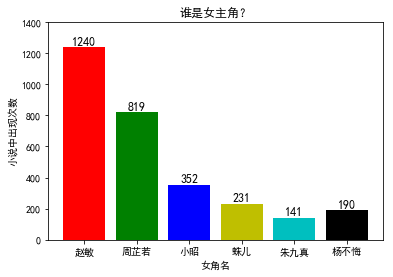

In [8]:
actress_data = {'赵敏':1240,'周芷若': 819,'小昭': 352,'蛛儿': 231, '朱九真': 141,'杨不悔': 190}  
# 设置原始数据

for a, b in actress_data.items():
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=12)  
    # ha 文字指定在柱体中间， va指定文字位置 fontsize指定文字体大小

# 设置X轴Y轴数据，两者都可以是list或者tuple
x_axis = tuple(actress_data.keys())
y_axis = tuple(actress_data.values())
plt.bar(x_axis, y_axis, color='rgbyck')  
# 如果不指定color，所有的柱体都会是一个颜色
#b: blue g: green r: red c: cyan
#m: magenta y: yellow k: black w: white
plt.xlabel("女角名")  # 指定x轴描述信息
plt.ylabel("小说中出现次数")  # 指定y轴描述信息
plt.title("谁是女主角？")  # 指定图表描述信息
plt.ylim(0, 1400)  # 指定Y轴的高度
plt.show()

赵敏：最终在一起的；周芷若：很是坎坷...；小昭 ：不可抗拒的外力给分开了；  
蛛儿：暂且说是女方单恋吧...；朱九真 ：过客，不过也算是张无忌情窦初开喜欢的一个；  
杨不悔：只能说是玩伴。

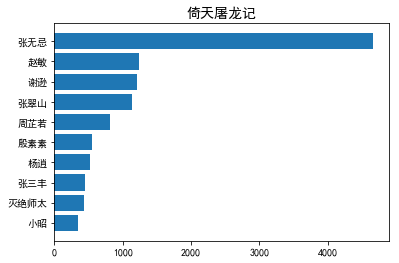

In [10]:
#继续挖掘下倚天屠龙记里面人物出现次数排名
namelist=[name.strip() for name in novel_names['倚天屠龙记']]
namelist=''.join(namelist)
namelist=namelist.split('、')
count = []
num=10 #统计前10名

for name in namelist:
    count.append([name, data.count(name)])
count.sort(key=lambda x: x[1])
_, ax = plt.subplots()
numbers = [x[1] for x in count[-num:]]
names = [x[0] for x in count[-num:]]
ax.barh(range(num), numbers, align='center')
ax.set_title('倚天屠龙记', fontsize=14)
ax.set_yticks(range(num))
ax.set_yticklabels(names, fontsize=10)
plt.show()

In [11]:
file='D:/CuteHand/jr_novels/'
with open(file+"kungfu.txt") as f:
    kungfu_names = [line.strip() for line in f.readlines()]
with open(file+"bangs.txt") as f:
    bang_names = [line.strip() for line in f.readlines()]
l1=len(kungfu_names)
l2=len(bang_names)
print("金庸武侠功夫：{}种 \n".format(l1) ,kungfu_names)
print("金庸武侠门派：{}个 \n".format(l2) ,bang_names)

金庸武侠功夫：246种 
 ['少林长拳', '少林罗汉拳', '少林擒拿十八打', '一指禅', '易筋经', '大金刚掌', '袈裟伏魔功', '伏魔禅杖', '多罗叶指', '无相劫指', '擒龙功', '少林握石掌', '达摩掌', '大韦陀杵', '少林降魔刀', '少林伏虎掌', '袖里乾坤', '少林拦云手', '少林快掌', '千手如来掌', '一拍二散', '天竺佛指', '劈空神拳', '慈悲刀', '大智无定指', '神拳八打', '韦陀棍', '去烦恼指', '大力金刚指', '般若掌', '摩诃指', '寂灭抓', '罗汉伏魔神功', '达摩剑', '如影随形腿', '韦陀拳', '罗汉剑', '因陀罗抓', '拈花指', '大慈大悲千叶手', '燃木刀', '日月鞭', '少林九阳', '金刚伏魔圈', '普渡仗', '金刚护体神功', '大力魔爪功', '少林龙爪功', '少林虎爪功', '金刚禅狮子吼', '躲刚拳', '斩蛟拳', '韦陀伏魔剑', '大力金刚抓', '少林降魔掌', '大韦陀掌', '少林醉拳', '少林疯魔杖', '夜叉棍', '取经棍', '查拳', '潭腿', '花拳', '洪门拳', '太极剑', '太极拳', '柔云剑', '绕指柔剑', '玄虚刀', '武当长拳', '武当绵掌', '武当推云手', '武当九阳', '倚天屠龙功', '纯阳无极功', '太极神功', '神门十三剑', '虎爪绝户手', '武当两仪剑', '羽衣刀', '降龙十八掌', '打狗棒', '逍遥拳', '锁喉擒拿手', '缠丝擒拿手', '龙爪擒拿手', '丐帮混元牌', '丐帮摄心术', '蟹钳功', '北冥神功', '八荒六合唯我独尊功', '小无相功', '抽髓掌', '化功大法', '天山六阳掌', '段家剑', '六脉神剑', '一阳指', '枯荣禅功', '天龙佛门狮子吼', '九阴真经', '先天气功', '全真基剑', '左右双手互搏', '空明拳', '玉女心经', '玉女剑', '玉女素心剑', '古墓九阴', '天罗地网掌', '手挥五弦', '赤练神掌', '金铃银索', '五毒神掌', '三无三不手', '黯然销魂掌', '拂尘功', '美女拳', '美女剑', '弹指神通', '落英神剑', '落英

In [12]:
#编写文本挖掘可视化函数
#寻找小说出现最多的十大人物
def find_main_characters(novel):
    file='D:/CuteHand/jr_novels/'
    with open(file+'names.txt') as f:
        df = [line.strip() for line in f.readlines()]
    novels = df[::2]
    names = df[1::2]
    novel_names = {k: v.split() for k, v in zip(novels, names)}
    with open(file+'{}.txt'.format(novel)) as f:
        data = f.read()
    count = []
    namelist=[name.strip() for name in novel_names[novel]]
    namelist=''.join(namelist)
    namelist=namelist.split('、')
    for name in namelist:
        count.append([name, data.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    num=10
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, align='center') 
    ax.set_title(novel+"出现最多的十大人物",fontsize=16)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14)

In [13]:
#寻找小说出现最多的十大武功
def kungfu(novel):
    file='D:/CuteHand/jr_novels/'
    with open(file+'{}.txt'.format(novel)) as f:
        df = f.read()
    namelist=kungfu_names
    count = []
    num=10 #统计前10名

    for name in namelist:
        count.append([name, df.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, align='center')
    ax.set_title(novel+"出现最多的十大武功", fontsize=16)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14)

In [14]:
#寻找小说出现最多的十大门派
def bang(novel):
    file='D:/CuteHand/jr_novels/'
    with open(file+'{}.txt'.format(novel)) as f:
        df = f.read()
    namelist=bang_names
    count = []
    num=10 #统计前10名

    for name in namelist:
        count.append([name, df.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, align='center')
    ax.set_title(novel+"出现最多的十大门派", fontsize=16)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14)

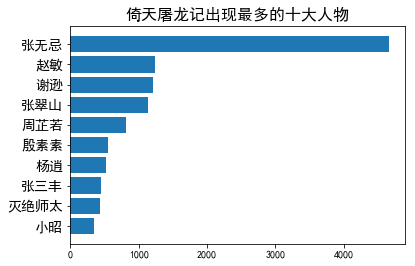

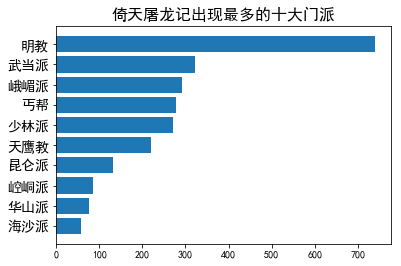

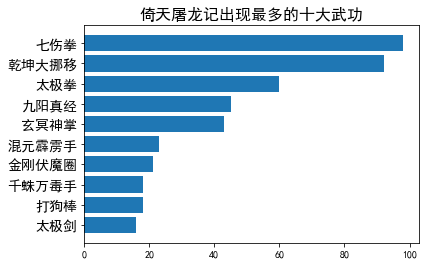

In [15]:
#将三个函数合成一个主函数
def main(novel):
    find_main_characters(novel)
    bang(novel)
    kungfu(novel)
main('倚天屠龙记')

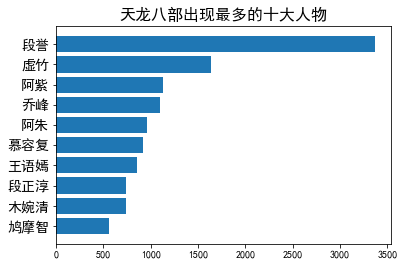

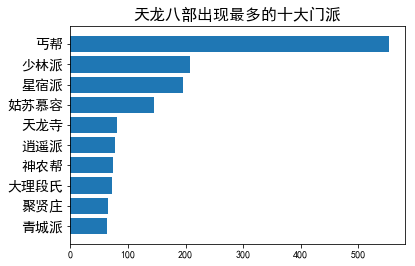

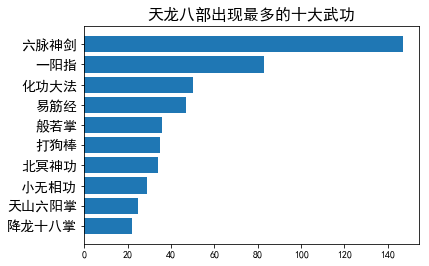

In [184]:
main('天龙八部')

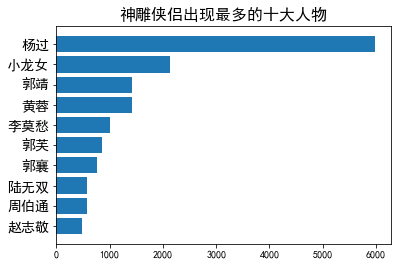

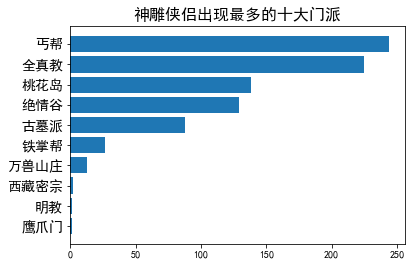

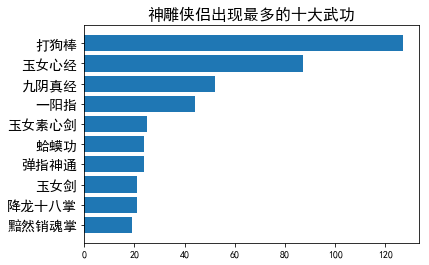

In [185]:
main('神雕侠侣')

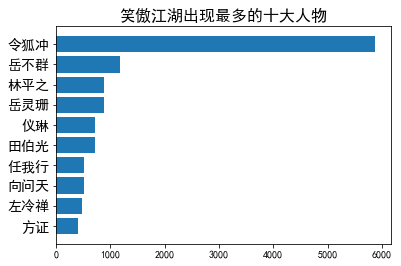

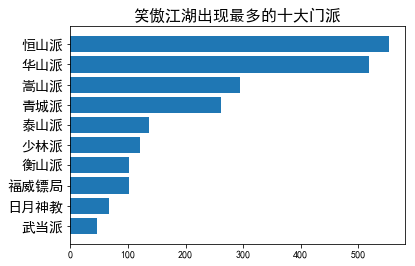

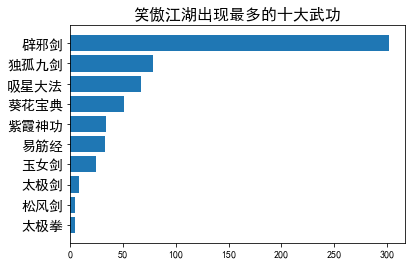

In [186]:
main('笑傲江湖')

### 文本挖掘

In [161]:
#先安装包
#pip install gensim
#pip install jieba
import gensim
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')
warnings.filterwarnings(action='ignore',category=FutureWarning,module='gensim')
import jieba
for _, names in novel_names.items():
    for name in names:
        jieba.add_word(name)
file='D:/CuteHand/jr_novels/'
with open(file+"kungfu.txt") as f:
    kungfu_names = [line.strip() for line in f.readlines()]
with open(file+"bangs.txt") as f:
    bang_names = [line.strip() for line in f.readlines()]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

In [149]:
books = ['天龙八部','鹿鼎记','神雕侠侣','笑傲江湖','碧血剑','倚天屠龙记',\
             '飞狐外传','书剑恩仇录','侠客行','鸳鸯刀','白马啸西风',\
             '雪山飞狐']
sentences = []
for novel in books:
    print ("处理：{}".format(novel))
    with open(file+'{}.txt'.format(novel)) as f:
        data = [line.strip() for line in f.readlines() if line.strip()]
    for line in data:
        words = list(jieba.cut(line))
        sentences.append(words)

处理：天龙八部
处理：鹿鼎记
处理：神雕侠侣
处理：笑傲江湖
处理：碧血剑
处理：倚天屠龙记
处理：飞狐外传
处理：书剑恩仇录
处理：侠客行
处理：鸳鸯刀
处理：白马啸西风
处理：雪山飞狐


In [19]:
model = gensim.models.Word2Vec(sentences, size=100,window=5, min_count=5, workers=4)

In [26]:
model.wv.most_similar('黄蓉')

[('殷梨亭', 0.8404989242553711),
 ('闵柔', 0.8335189819335938),
 ('石清', 0.8297028541564941),
 ('完颜萍', 0.8262143135070801),
 ('王语嫣', 0.8170520067214966),
 ('纪晓芙', 0.8106707334518433),
 ('郭襄', 0.803936779499054),
 ('郭靖', 0.8032572865486145),
 ('俞岱岩', 0.8016955852508545),
 ('陆无双', 0.7999300956726074)]

In [24]:
Actress=['赵敏','周芷若','小昭','蛛儿','朱九真','杨不悔']
for a in Actress:
    print("张无忌与%s的相关度" % a,model.wv.similarity('张无忌',a)) 

张无忌与赵敏的相关度 0.7922112
张无忌与周芷若的相关度 0.7983359
张无忌与小昭的相关度 0.60103273
张无忌与蛛儿的相关度 0.7526051
张无忌与朱九真的相关度 0.5569755
张无忌与杨不悔的相关度 0.5574214


In [30]:
def find_relationship(a, b, c):
    """
    返回 d 
    a与b的关系，跟c与d的关系一样    
    """
    d, _ = model.wv.most_similar([c, b], [a])[0]
    print ("给定“{}”与“{}”，“{}”和“{}”有类似的关系".format(a, b, c, d))
find_relationship('小龙女','杨过' ,'黄蓉')

给定“小龙女”与“杨过”，“黄蓉”和“郭襄”有类似的关系


In [31]:
name1='小龙女'
names2=['李莫愁','周伯通', '裘千尺', '尼摩星', '杨过','黄蓉','郭靖']
results = {};
for i in range(0,len(names2)):
    results[names2[i]] = model.wv.similarity(name1,names2[i])
results

{'李莫愁': 0.7754098,
 '周伯通': 0.6485876,
 '裘千尺': 0.7010936,
 '尼摩星': 0.40472782,
 '杨过': 0.8567139,
 '黄蓉': 0.74792933,
 '郭靖': 0.59991145}

In [32]:
model.wv.most_similar("小龙女")

[('杨过', 0.8567138910293579),
 ('周芷若', 0.8188004493713379),
 ('王语嫣', 0.8068219423294067),
 ('陆无双', 0.7984269857406616),
 ('赵敏', 0.7830055952072144),
 ('盈盈', 0.7791746854782104),
 ('岳灵珊', 0.7759054899215698),
 ('李莫愁', 0.7754099369049072),
 ('林平之', 0.7652036547660828),
 ('令狐冲', 0.7587623596191406)]

In [33]:
#匹配关系
model.wv.most_similar(['黄蓉', '杨过'],['小龙女'])

[('郭襄', 0.7305915951728821),
 ('陆无双', 0.7222201824188232),
 ('郭靖', 0.7200890183448792),
 ('王语嫣', 0.7189722657203674),
 ('闵柔', 0.7158554792404175),
 ('殷梨亭', 0.706352710723877),
 ('武三通', 0.7020351886749268),
 ('俞岱岩', 0.7013769149780273),
 ('李莫愁', 0.6999802589416504),
 ('萧峰', 0.6990445852279663)]

### 词云

In [48]:
import jieba
import numpy as np
import codecs
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [88]:
text=codecs.open('D:/CuteHand/jr_novels/倚天屠龙记.txt','rb','gbk').read()

In [89]:
import jieba.analyse
tags=jieba.analyse.extract_tags(text,topK=10)

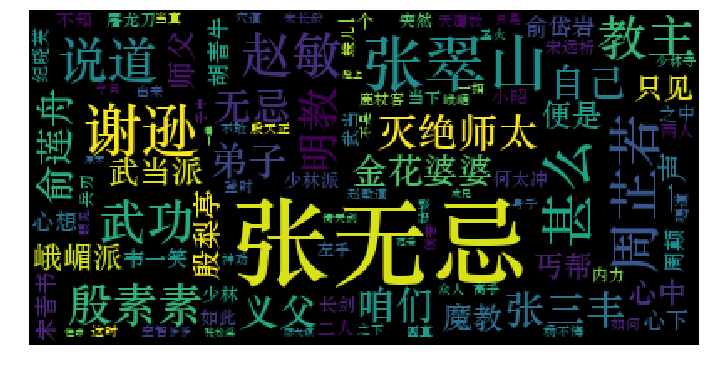

In [122]:
tags=jieba.analyse.extract_tags(text,topK=100,withWeight=True)
tf=dict((a[0],a[1]) for a in tags)
wc=WordCloud(font_path='C:\Windows\Fonts\STZHONGS.TTF')
wc=wc.generate_from_frequencies(tf)
plt.figure(num=None,figsize=(12,10),facecolor='w',edgecolor='k')
plt.imshow(wc)
plt.axis('off')
plt.show()

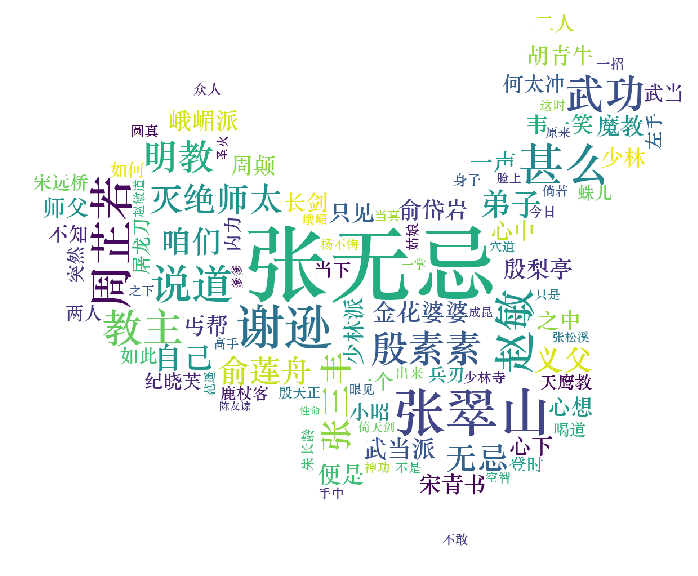

In [131]:
#生成特定形状的词云
backgroud_Image = plt.imread('D:/CuteHand/jr_novels/地图.jpg')
#可以自己找适合的图片做背景，最后是背景白色
wc = WordCloud(
    background_color='white',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path='C:\Windows\Fonts\STZHONGS.TTF',  
    # 若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
    max_words=2000, # 设置最大现实的字数
    stopwords=STOPWORDS,# 设置停用词
    max_font_size=150,# 设置字体最大值
    random_state=30# 设置有多少种随机生成状态，即有多少种配色方案
)
wc.generate_from_frequencies(tf)

#img_colors = ImageColorGenerator(backgroud_Image)
#字体颜色为背景图片的颜色
#wc.recolor(color_func=img_colors)
plt.figure(num=None,figsize=(12,10),facecolor='w',edgecolor='k')
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.axis('off')
plt.show()

In [135]:
#包装成函数
def jr_cloud(novel,file):
    import jieba
    import jieba.analyse
    import numpy as np
    import codecs
    import pandas as pd
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
    text=codecs.open(file+'{}.txt'.format(novel),'rb','gbk').read()
    tags=jieba.analyse.extract_tags(text,topK=50,withWeight=True)
    tf=dict((a[0],a[1]) for a in tags)
    wc=WordCloud(font_path='c:\windows\fonts\simsun.ttc',
        background_color='white')
    wc=wc.generate_from_frequencies(tf)
    plt.figure(num=None,figsize=(12,10),facecolor='w',edgecolor='k')
    plt.title(novel,fontsize=18)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

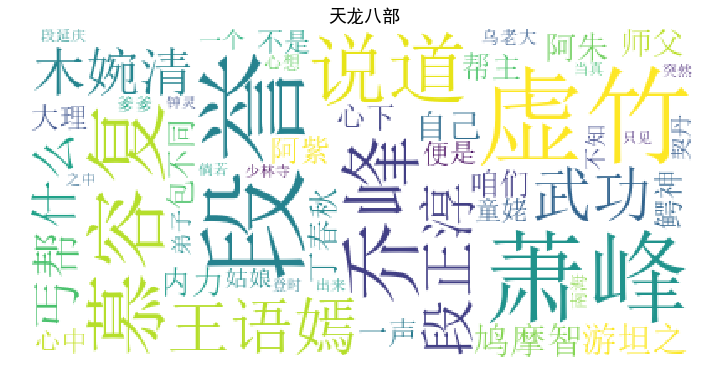

In [136]:
file='D:/CuteHand/jr_novels/'
novels = ['天龙八部','鹿鼎记','神雕侠侣','笑傲江湖','碧血剑','倚天屠龙记',\
             '飞狐外传','书剑恩仇录','侠客行','鸳鸯刀','白马啸西风',\
             '雪山飞狐']
jr_cloud(novels[0],file)

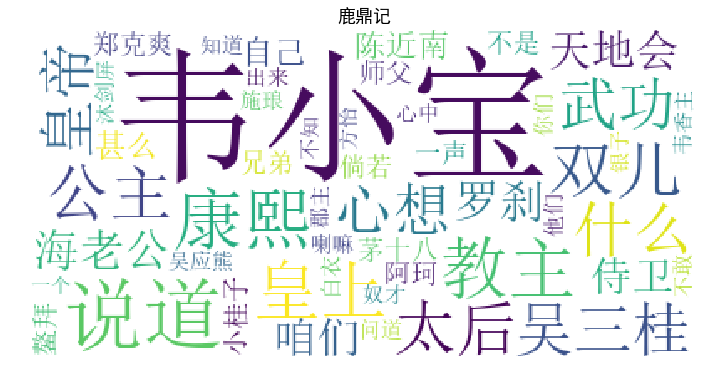

In [137]:
#鹿鼎记词云
jr_cloud(novels[1],file)

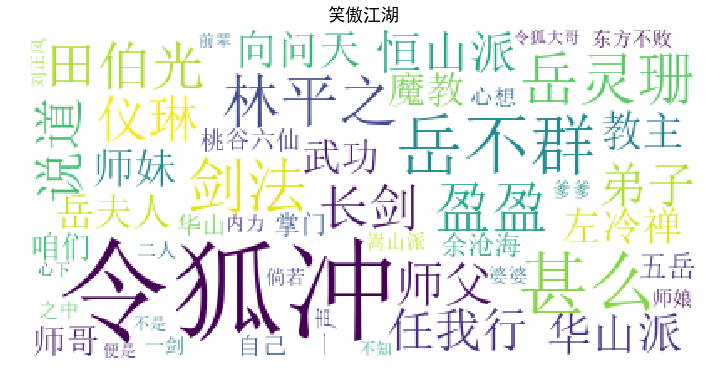

In [138]:
#笑傲江湖词云
jr_cloud(novels[3],file)

In [219]:
import networkx as nx
import matplotlib.pyplot as plt

import jieba
import codecs
import jieba.posseg as pseg


names = {}          # 姓名字典
relationships = {}  # 关系字典
lineNames = []      # 每段内人物关系

# count names
jieba.load_userdict(novel_names['倚天屠龙记'])      # 加载字典
with codecs.open("D:/CuteHand/jr_novels/倚天屠龙记.txt", "r") as f:
    for line in f.readlines():
        poss = pseg.cut(line)       # 分词并返回该词词性
        lineNames.append([])        # 为新读入的一段添加人物名称列表
        for w in poss:
            if w.flag != "nr" or len(w.word) < 2:
                continue            # 当分词长度小于2或该词词性不为nr时认为该词不为人名
            lineNames[-1].append(w.word)        # 为当前段的环境增加一个人物
            if names.get(w.word) is None:
                names[w.word] = 0
                relationships[w.word] = {}
            names[w.word] += 1                  # 该人物出现次数加 1

# explore relationships
for line in lineNames:                  # 对于每一段
    for name1 in line:                  
        for name2 in line:              # 每段中的任意两个人
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     # 若两人尚未同时出现则新建项
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1        # 两人共同出现次数加 1



with codecs.open("D:/CuteHand/jr_novels/person_edge.txt", "a+", "utf-8") as f:

    for name, edges in relationships.items():
        for v, w in edges.items():
            if w >500:
                f.write(name + " " + v + " " + str(w) + "\r\n")

a = []
f = open('D:/CuteHand/jr_novels/person_edge.txt','r',encoding='utf-8')
line = f.readline()
while line:
    a.append(line.split())   #保存文件是以空格分离的
    line = f.readline()
f.close()

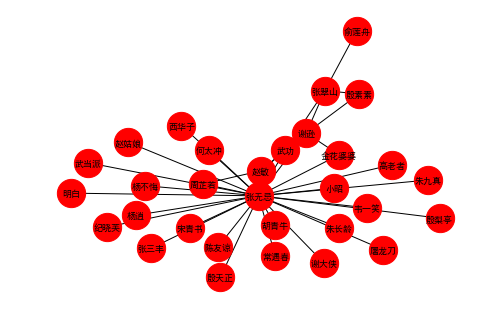

In [222]:
#画图
G = nx.Graph()
G.add_weighted_edges_from(a)
nx.draw(G,with_labels=True,font_size=9,node_size=800,node_color='r')
plt.show()